# Assignment 5: PCA and Neural Networks (50 marks)
### Due: April 4 at 11:59pm

### Name: Maryam Alsayed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (20 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [3]:
# TO DO: Import dataset and inspect the first few columns (1 mark)
column_names = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove_length', 'target']
data = pd.read_csv("seeds_dataset.txt", sep = '\t', header = None, names = column_names)
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [4]:
# TO DO: Separate the data into feature matrix and target vector. Print the shape of X and y (1 mark)
X = data.drop('target', axis = 1)
y = data['target']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (210, 7)
Target vector shape: (210,)


### Steps 2+3: Preprocessing and Model Selection (3 marks)

The first step is to split the data into training and testing sets.

In [5]:
# TO DO: Split the data into training and testing sets using 10% for test set (1 mark)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

Now that we have our training data, we need to decide which preprocessing methods to use. Since we do not want any information leaking into the model validation stage, we will need to create a Pipeline. For this case, our model for the Pipeline is `Logistic Regression(max_iter=1000)`.

In [6]:
# TO DO: Setup required preprocessing method(s) and model (1 mark)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()
model = LogisticRegression(max_iter=1000)

In [7]:
# TO DO: Setup pipeline (1 mark)
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', model)
])

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
param_grid = [{'classifier': [LogisticRegression(max_iter=1000)],
              'classifier__C': [0.01, 0.1, 1.0, 10.0, 100],
              'classifier__fit_intercept': [True, False]}]

In [9]:
#TO DO: Implement the grid search and print the best parameters, training score, cross-validation score and test score (2 marks)
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Training accuracy:", grid_search.best_score_)
print("Test accuracy:", grid_search.score(X_test, y_test))

Best params: {'classifier': LogisticRegression(max_iter=1000), 'classifier__C': 10.0, 'classifier__fit_intercept': True}
Training accuracy: 0.9524893314366999
Test accuracy: 1.0


### Step 5: Visualize using PCA (5 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [10]:
# TO DO: Predict target vector labels using best estimator (1 mark)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [11]:
# TO DO: Reduce dimensions of test data for plotting (2 marks)
pca = PCA(n_components = 2)
scaler = best_model.named_steps['scaler']

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

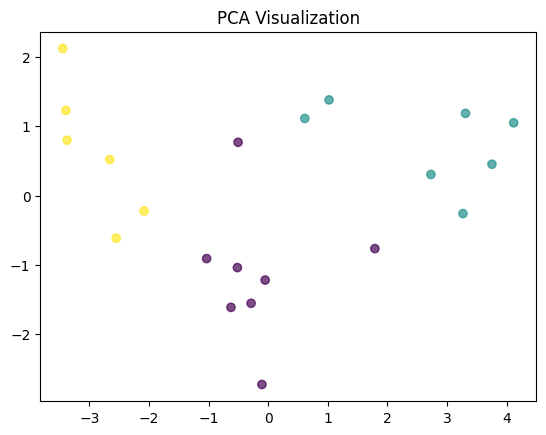

In [12]:
# TO DO: Plot test points colored by predicted label (2 marks)
plt.figure()
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap = 'viridis', alpha = 0.7)
plt.title("PCA Visualization")
plt.show()

### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion?
1. Did PCA work well for this model? How does this relate to the results from the model used?

- Yes, the logistic regression model worked well for this dataset. I made this conclusion based on the test accuracy, which was very high.
- Yes, PCA worked fairly well for this model. This is clear based on the plot, which shows 3 distinct clusters of points.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

- I sourced my code from Kaggle (dataset information), lecture slides/examples, and generative AI.
- I completed the steps in the order that they were provided.
- The prompts I used involved providing the AI with code I had already completed alongside the specific to-do and asking it to explain the ideas or explain the process required to complete the task. I did not have to modify the code much as it was produced in small chunks or used for bug-fixing.
- I did not face many challenges with this section. I found that reading the documentation of the dataset and the lecture slides was helpful in completing the tasks.

## Part 2: Neural Networks (28 marks)

For this assignment, you will be practicing using scikit-learn and TensorFlow to implement basic neural networks (MLP). The dataset we will be using is the energy dataset from Yellowbrick (https://www.scikit-yb.org/en/latest/api/datasets/energy.html).

### Step 1: Load data (1 mark)

You will need to load the file and split it into the feature matrix and target vector. Note that this dataset has two targets, heating load and cooling load. To retrieve the single target dataset, you need `return_dataset=False`.

In [13]:
# TO DO: Load dataset into feature matrix and target vector (1 mark)
import yellowbrick
from yellowbrick.datasets import load_energy

X, y = load_energy(return_dataset=False)

### Step 2: Process your dataset (6 marks)

In [14]:
# TO DO: Check if there are any missing values - if yes, decide how to fill them (1 mark)
X.isnull().sum() # all results are 0, no missing values to fill

,0
relative compactness,0
surface area,0
wall area,0
roof area,0
overall height,0
orientation,0
glazing area,0
glazing area distribution,0


In [15]:
# TO DO: Check data type for each column and the number of unique values - do you need to encode any of them? (1 mark)
print(X.dtypes)
print('\n', X.nunique())

relative compactness         float64
surface area                 float64
wall area                    float64
roof area                    float64
overall height               float64
orientation                    int64
glazing area                 float64
glazing area distribution      int64
dtype: object

 relative compactness         12
surface area                 12
wall area                     7
roof area                     4
overall height                2
orientation                   4
glazing area                  4
glazing area distribution     6
dtype: int64


In [16]:
# TO DO: Check the range of each feature - do you need to scale your data? (1 mark)
X.describe()

,relative compactness,surface area,wall area,roof area,overall height,orientation,glazing area,glazing area distribution
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [17]:
# TO DO: Split your data into training and testing sets using 20% for test set (1 mark)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
# TO DO: Implement scaling and/or encoding here if needed (2 marks for preprocessing properly or justifying why it isn't needed)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Don't need to encode since there are no non-numeric values

### Step 3: Implement Neural Network (MLP) (8 marks)

### Part 1: Use scikit-learn (3 marks)

For each case, you will need to find the predicted target values.

In [19]:
# TO DO: Test using default parameters and max_iter = 10000 (1 mark)
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=10000, random_state = 0)
mlp.fit(X_train_scaled, y_train)
y_pred_one = mlp.predict(X_test_scaled)

In [20]:
# TO DO: Test using two hidden layers with 100 nodes each (1 mark)
mlp_two_layers = MLPRegressor(hidden_layer_sizes = (100, 100),
                             max_iter=10000,
                             random_state = 0)
mlp_two_layers.fit(X_train_scaled, y_train)
y_pred_two = mlp_two_layers.predict(X_test_scaled)

In [21]:
# TO DO: Test using three hidden layers with 100 nodes each (1 mark)
mlp_three_layers = MLPRegressor(hidden_layer_sizes = (100, 100, 100),
                               max_iter = 10000,
                               random_state = 0)
mlp_three_layers.fit(X_train_scaled, y_train)
y_pred_three = mlp_three_layers.predict(X_test_scaled)

### Part 2: Use TensorFlow (5 marks)

In [23]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

Instead of scaling the data using a scikit-learn scaler, you can scale the data using a normalization layer.

In [24]:
# TO DO: Define normalization layer (1 mark)
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train_scaled)

Using `keras.Sequential`, implement an MLP with the same hidden layer setups as above:

In [46]:
# TO DO: Implement MLP with one hidden layer with 100 nodes and the relu activation function (2 marks)
# Compile the model with loss='mean_absolute_error' and optimizer=tf.keras.optimizers.Adam(0.001)
# Fit the model using validation_split=0.2, verbose=0 and epochs=100
tf_one = keras.Sequential([
    normalizer,
    layers.Dense(100, activation='relu'),
    layers.Dense(1)
])
tf_one.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
tf_one.fit(X_train_scaled, y_train, validation_split = 0.2, verbose = 0, epochs = 100)
y_pred_tf_one = tf_one.predict(X_test_scaled).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [47]:
# TO DO: Repeat with two hidden layers with 100 nodes each and the relu activation function (1 mark)
tf_two = keras.Sequential([
    normalizer,
    layers.Dense(100, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(1)
])
tf_two.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))
tf_two.fit(X_train_scaled, y_train, validation_split = 0.2, verbose = 0, epochs = 100)
y_pred_tf_two = tf_two.predict(X_test_scaled).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [48]:
# TO DO: Repeat with three hidden layers with 100 nodes each and the relu activation function (1 mark)
tf_three = keras.Sequential([
    normalizer,
    layers.Dense(100, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(1)
])
tf_three.compile(loss = 'mean_absolute_error', optimizer = tf.keras.optimizers.Adam(0.001))
tf_three.fit(X_train_scaled, y_train, validation_split = 0.2, verbose = 0, epochs = 100)
y_pred_tf_three = tf_three.predict(X_test_scaled).flatten()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


### Step 4: Compare the accuracy of both methods (4 marks)

For this part, calculate the mean absolute error for each model and print in a table using pandas

In [49]:
# TO DO: Calculate the MAE for the three scikit-learn tests (1.5 marks)
from sklearn.metrics import mean_absolute_error
mae_mlp_one = mean_absolute_error(y_test, y_pred_one)
mae_mlp_two = mean_absolute_error(y_test, y_pred_two)
mae_mlp_three = mean_absolute_error(y_test, y_pred_three)

In [50]:
# TO DO: Calculate the MAE for the three TensorFlow tests (1.5 marks)
mae_tf_one = mean_absolute_error(y_test, y_pred_tf_one)
mae_tf_two = mean_absolute_error(y_test, y_pred_tf_two)
mae_tf_three = mean_absolute_error(y_test, y_pred_tf_three)

In [51]:
# TO DO: Print the results (1 mark)
results = {
    "MLP One Layer": mae_mlp_one,
    "MLP Two Layers": mae_mlp_two,
    "MLP Three Layers": mae_mlp_three,
    "Tensor One Layer": mae_tf_one,
    "Tensor Two Layers": mae_tf_two,
    "Tensor Three Layers": mae_tf_three
}

for key in results:
    print(key, ":", results[key])

MLP One Layer : 0.9935643453443658
MLP Two Layers : 2.094192696262098
MLP Three Layers : 0.8060847293078196
Tensor One Layer : 2.3239397612485013
Tensor Two Layers : 2.2870949839307118
Tensor Three Layers : 1.3240993605031597


### Questions (5 marks)

1. Which model produced the least amount of error?
1. Do the results change if you run your code multiple times? Why or why not?
1.  Why are the numbers different between the scikit-learn and TensorFlow methods when we used the same number of hidden layers and hidden units per layer? List two potential reasons.

- The MLPRegressor model with three layers produced the least amount of error with a value of 0.806.
- The results change, albeit very slightly. This may be because of the randomized initialization process, as neural networks start with random weights, which affects training.
- One reason the numbers are different between the methods due to the different default settings between both methods, such as optimizers. The optimizer used with tensorflow and the optimizer used in sklearn may have different parameters/effects. Another reason for the difference is the epoch value. When using tensorflow, we manually set epochs = 100, whereas sklearn may have its own value that differs.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

- I sourced my code from lecture slides, examples, and generative AI.
- I completed the steps in the exact order they were provided.
- I used generative AI to help with errors and for points of confusion. I did need to modify the code at times due to it altering my own code, making code excessively complicated, or adding unnecessary detail that was beyond the scope of the assignment. The prompts I used involved providing the AI with text/code and asking it to explain the process or provide information on how it worked.
- I did find step 3 challenging as I was unsure if I was correctly executing the steps. I also had issues using tensorflow, as the module was not working in Jupyter notebook, although this was likely a local issue with my machine. I switched to Google Colaboratory to complete the remainder of the assignment.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


- As with the other assignments through the semester, I appreciated the step-by-step presentation of the work, as well as the mark breakdown being listed with each part of the assignment.
- I found the process of implementing neural networks to be quite interesting.